<a href="https://colab.research.google.com/github/NerijusSh/demo/blob/main/135.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1: Data Wrangling with Python
## Sprint 3: Data Visualization with Python
## Part 5: Coursera Course Analysis


## About this Part

Congrats!
You have reached the last Part of this Sprint.
In this Part, you will need to use all that you learned in this and previous Sprints.
As the final assignment of this Sprint, you will analyse the Coursera Course Dataset.
You will have to apply all that you have learned about Data Visualization & Data Analysis to complete this task.
You'll notice that in this project you have fewer explicitly stated requirements.
Our expectation is that you'll use your own judgement how to perform the analysis and how to select the most important avenues of exploration.
You'll have to iteratively raise hypotheses and use your data analysis skills to get answers.

## Objectives for this Part

- Practice working with data from Kaggle.
- Practice performing basic EDA.
- Practice visualizing data with Matplotlib & Seaborn.
- Practice reading data, performing queries and filtering data using Pandas.

## Requirements

- Download the data from [Coursera Course Dataset](https://www.kaggle.com/siddharthm1698/coursera-course-dataset).
- Load the data using Pandas.
- Perform data cleaning.
- Perform exploratory data analysis.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
- Provide suggestions about how your analysis can be improved.

## Evaluation Criteria

- Adherence to the requirements. How well did you meet the requirements?
- Visualization quality. Did you use charts effectively to visualize patterns in the data? Are your visualizations properly labeled? Did you use colors effectively? Did you adhere to the principle of proportional ink?
- Code quality. Was your code well-structure? Did you use the appropriate levels of abstraction? Did you remove commented out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use the suitable algorithms and data structures to solve the problems?

## Sample Correction Questions

During a correction, you may get asked questions that test your understanding of covered topics.

- What is the difference between continuous and discrete distributions?
- What is a Bernoulli trial?
- What is a Standard Normal Distribution?
- What is a random variable?
- Explain the Bayes's Theorem
- Explain the Simpson's paradox


### Loading the data

In [ ]:
pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle datasets download -d siddharthm1698/coursera-course-dataset

  0% 0.00/22.8k [00:00<?, ?B/s]
100% 22.8k/22.8k [00:00<00:00, 19.2MB/s]


In [ ]:
!unzip coursera-course-dataset.zip

Archive:  coursera-course-dataset.zip
  inflating: coursea_data.csv        


### Reading the data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
coursera_df = pd.read_csv('coursea_data.csv', index_col=0)
coursera_df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


### Data Cleaning

Changing the index column to have normal index values instead of some numbers.

In [ ]:
coursera_df.reset_index(drop=True, inplace=True)

Using .info() to figure out what types of data we have, how many rows of data, how many columns and if there are any of null type data points.

In [ ]:
coursera_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 41.9+ KB


Although .info() shows that there are no null type values in our dataset we can double check it.

In [ ]:
coursera_df.isnull().values.any()

False

Also we need to check if there are any duplicated rows/columns

In [ ]:
coursera_df.duplicated().any()

False

To make the DataFrame easier to read I changed column names to be separated by spaces instead of '_'. This way I won't need to manually write label names later when plotting.

In [ ]:
coursera_df.set_axis(['Course title', 'Course organization',
                      'Course certificate type', 'Course rating',
                      'Course difficulty', 'Course students enrolled'],
                     axis='columns', inplace=True)

Our students enrolled column has numbers as string values and we don't want that. To fix it I wrote this function which multiplies values with 'k' in it by 1000 and values with 'm' in it by 1000000.

In [ ]:
def value_to_int(x):
    """Converts column values from string numbers with 'k' as thousands
    and 'm' as milions to integer values
    """
    if type(x)==float or type(x)==int:
        return int(x)
    if 'k' in x:
        new_x=float(x.replace('k', '')) * 1000
        return int(new_x)
    if 'm' in x:
        new_x=float(x.replace('m', '')) * 1000000
        return int(new_x)
coursera_df['Course students enrolled']=(coursera_df['Course students enrolled']
                                        .apply(value_to_int))

Now we can see that our column type is int64 and no longer object type.

In [ ]:
coursera_df['Course students enrolled'].dtype

dtype('int64')

In [ ]:
coursera_df.head()

,Course title,Course organization,Course certificate type,Course rating,Course difficulty,Course students enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000


### EDA

My goal of this project is to explore given dataset and make some points why you should pick Coursera as the website to learn new things and to get certificates in new fields.

Let's take a look at .describe() function to learn more about our dataset's numeric features.

In [ ]:
coursera_df.describe().apply(lambda x: x.apply('{:n}'.format)).drop('count')

,Course rating,Course students enrolled
mean,4.67733,90552.1
std,0.162225,181936
min,3.3,1500
25%,4.6,17500
50%,4.7,42000
75%,4.8,99500
max,5,3.2e+06


Here we can see that Course rating values range from 3.3 to 5, the average rating of a course is 4.67 and I would say that it's pretty good and that means courses are well made. Course students enrolled average is 90000, but looking at quartiles most of the courses have their Course students enrolled values below that.

##### How many combined students enrolled in Coursera courses ?

In [ ]:
total_students=coursera_df['Course students enrolled'].sum()
print(f'{total_students} combined students took Coursera courses')

80681900 combined students took Coursera courses


##### Boxplots

In [ ]:
sns.set_style("darkgrid")
sns.set_context("talk")

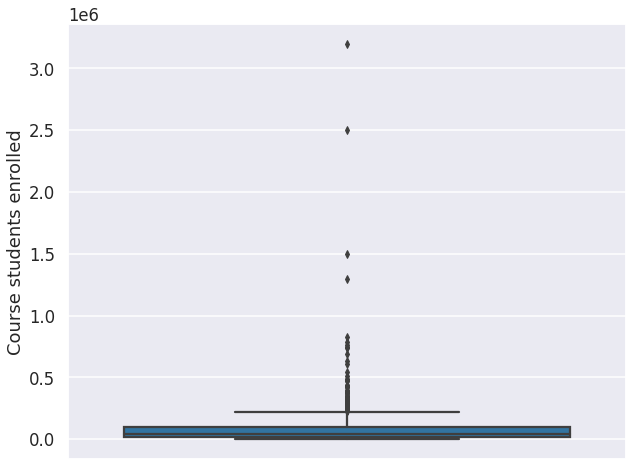

In [ ]:
fig=plt.figure(figsize=(10,8))
ax=plt.axes()

sns.boxplot(y='Course students enrolled', data=coursera_df)

plt.show()

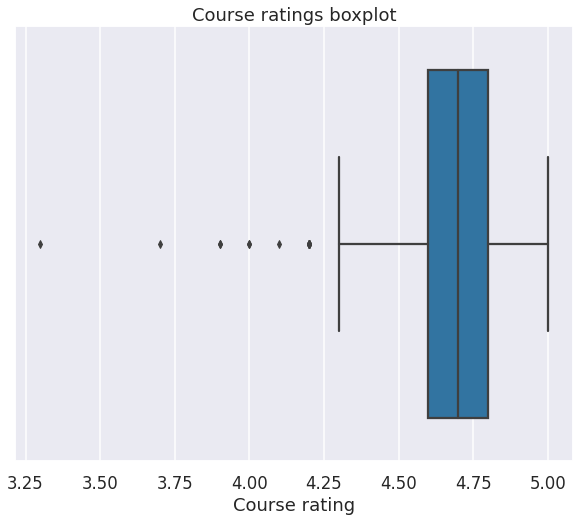

In [ ]:
fig=plt.figure(figsize=(10,8))
ax=plt.axes()

sns.boxplot(x='Course rating', data=coursera_df)

plt.title('Course ratings boxplot')
plt.show()

Boxplots show us interquartile range, median and outliers. Looking at the charts they don't surprise us and only proves what .describe() function already showed us.

##### Ratings analysis

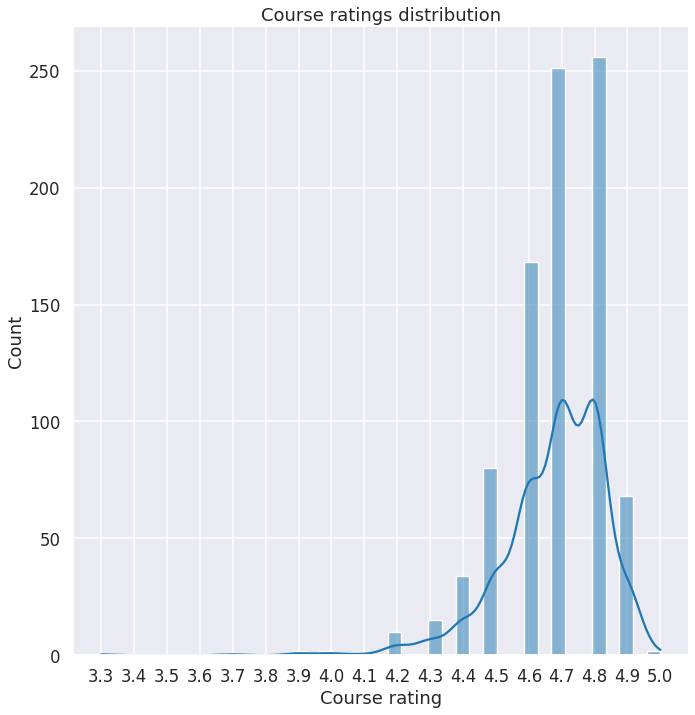

In [ ]:
g=sns.displot(data=coursera_df, x='Course rating', kind='hist',
              kde=True, height=10)
g.set(xticks=[3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4, 4.1, 
              4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5])

plt.title('Course ratings distribution')
plt.show()

In [ ]:
good_rated_count=(coursera_df['Course rating']
                  .loc[coursera_df['Course rating']>=4.5].count())

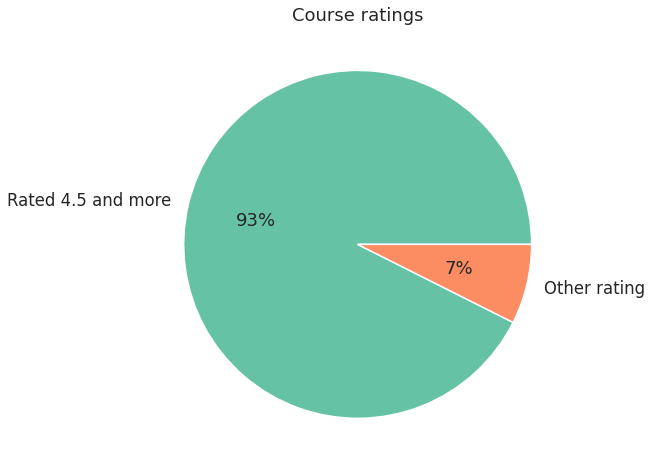

In [ ]:
fig=plt.figure(figsize=(12,8))

data=[good_rated_count/len(coursera_df),
      (len(coursera_df)-good_rated_count)/len(coursera_df)]
labels=['Rated 4.5 and more', 'Other rating']

colors=sns.color_palette('Set2')

plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')

plt.title('Course ratings')
plt.show()

In this pie chart we can see that 93% of Coursera courses are rated really well.

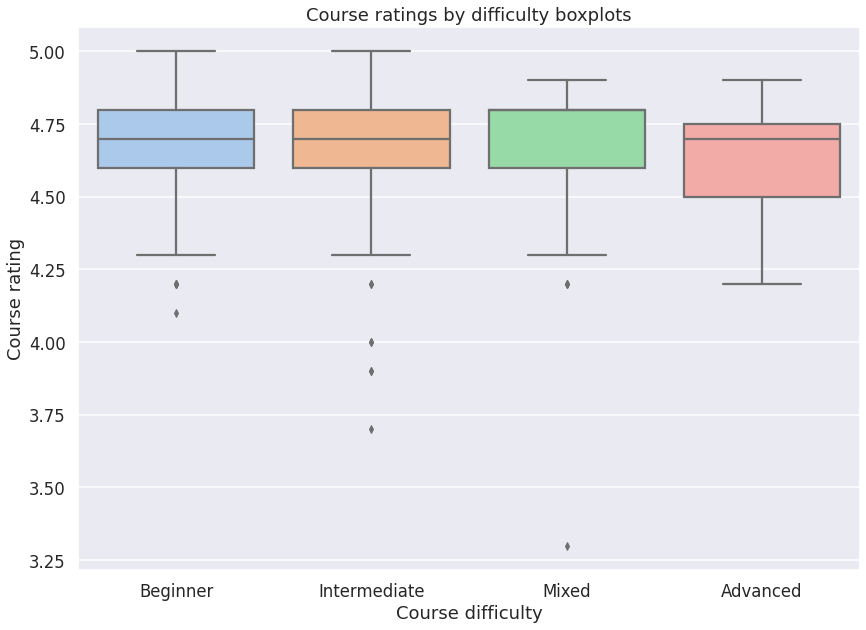

In [ ]:
fig=plt.figure(figsize=(14,10))
ax=plt.axes()

colors=sns.color_palette('pastel')

sns.boxplot(x='Course difficulty', y='Course rating', data=coursera_df,
            palette=colors)

plt.title('Course ratings by difficulty boxplots')
plt.show()

Beginner and Intermediate courses are rated better than Mixed and Advanced courses. Mixed courses also have the worst rated course amongst them.

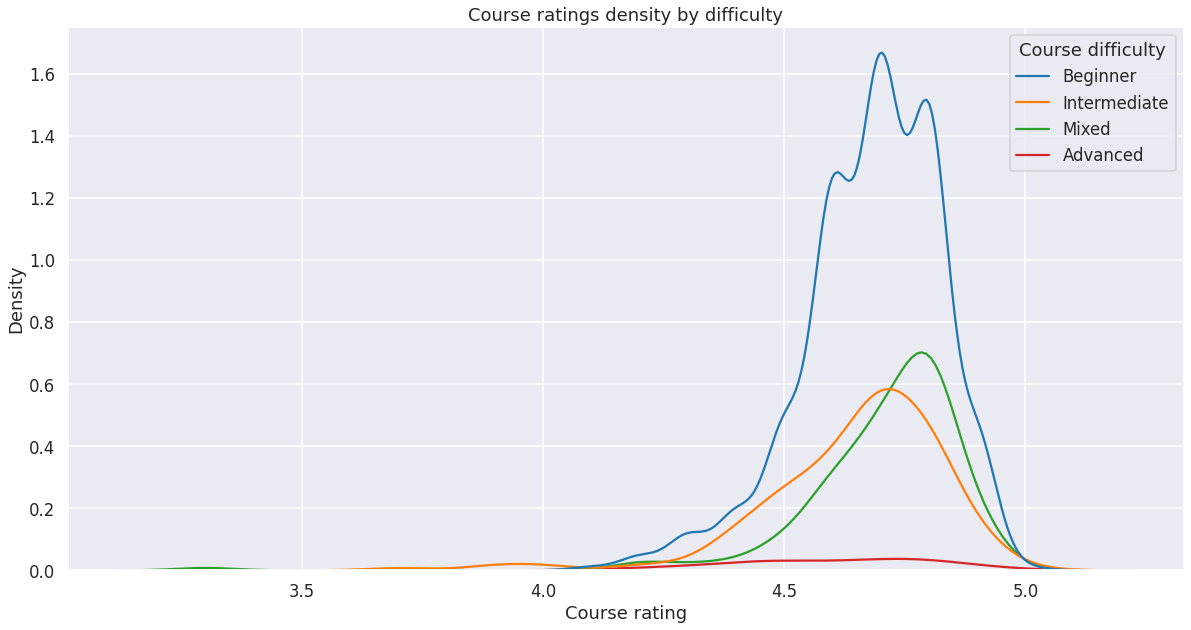

In [ ]:
fig=plt.figure(figsize=(20,10))

sns.kdeplot(data=coursera_df, x="Course rating", hue="Course difficulty")

plt.title('Course ratings density by difficulty')
plt.show()

In this chart we can see that there are more beginner level courses than other difficulty levels and they are mostly rated from 4.6 to 4.8

##### How does ratings of the courses correlate with students enrolled in those courses?

In [ ]:
corr=coursera_df.corr()
corr.drop(columns='Course students enrolled').drop(labels='Course rating')

,Course rating
Course students enrolled,0.07109


At first I thought that good ratings=many students enrolled, but as we can see there is only a slight positive correlation between them, but not significant enough to say that the best rated courses attract the most students.

##### How many courses of each difficulty level there is ?

In [ ]:
variety_of_difficulty=coursera_df['Course difficulty'].value_counts()
variety_of_difficulty

Beginner        487
Intermediate    198
Mixed           187
Advanced         19
Name: Course difficulty, dtype: int64

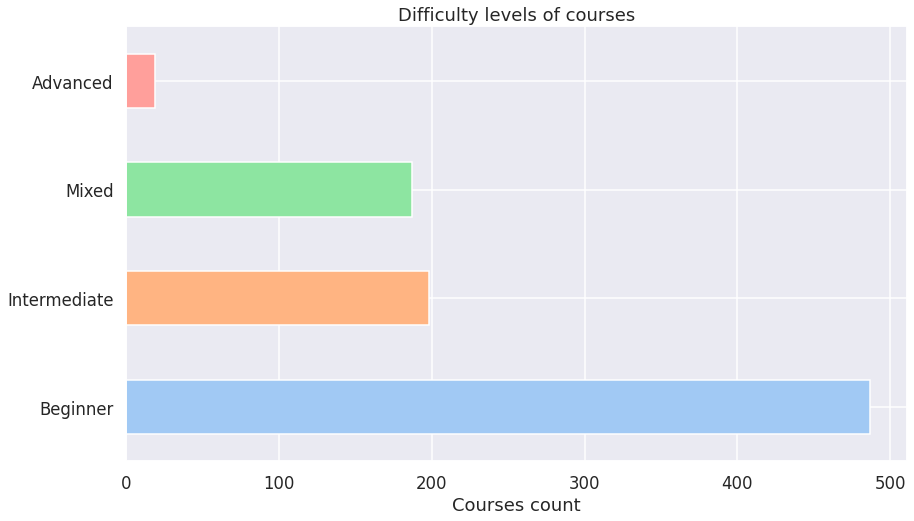

In [ ]:
plt.figure(figsize=(14,8))

color=sns.color_palette("pastel")
variety_of_difficulty.plot(kind='barh', color=color)

plt.title('Difficulty levels of courses')
plt.xlabel('Courses count')
plt.show()

This graph shows us that there is more Beginner level courses than other 3 combined. Coursera courses are very newbie friendly, but if you're above beginner level there are plenty of higher difficulty level courses aswell.

##### What is the title of most popular course ? (By students enrolled)

In [ ]:
most_popular=coursera_df.nlargest(1, 'Course students enrolled')['Course title']
most_popular

564    Machine Learning
Name: Course title, dtype: object

##### How many students does it have enrolled ?

In [ ]:
students_enrolled=coursera_df['Course students enrolled'].max()
print(f'{students_enrolled} students enrolled')

3200000 students enrolled


##### Who made this course ?

In [ ]:
coursera_df.nlargest(1, 'Course students enrolled')['Course organization']

564    Stanford University
Name: Course organization, dtype: object

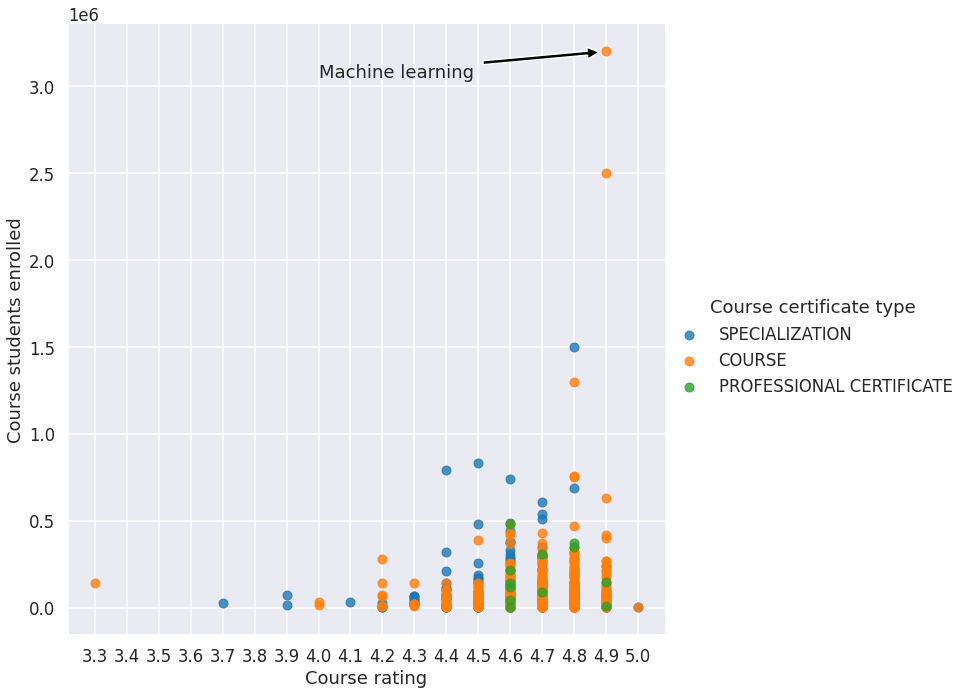

In [ ]:
g=sns.lmplot(data=coursera_df, x='Course rating', y='Course students enrolled',
             hue='Course certificate type', fit_reg=False, height=10)

xmax=(coursera_df['Course rating']
      .loc[coursera_df['Course students enrolled']
           ==coursera_df['Course students enrolled'].max()])
ymax=coursera_df['Course students enrolled'].max()

g.set(xticks=[3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4, 4.1,
              4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5])
plt.annotate('Machine learning', xy=(xmax, ymax), xytext=(4, 3050000),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

In this scatterplot we can see that our most popular course is of 'COURSE' certificate type and how it compares to the rest of the courses by ratings and students enrolled.

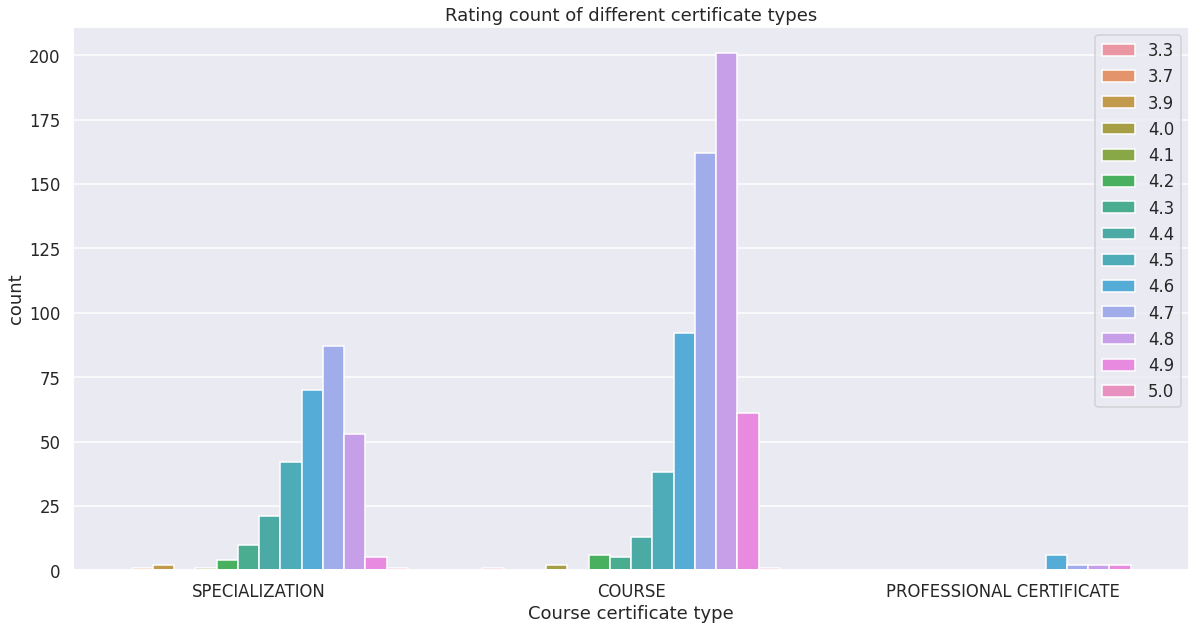

In [ ]:
fig=plt.figure(figsize=(20,10))

sns.countplot(data=coursera_df, x='Course certificate type',
              hue='Course rating')

plt.legend(loc='upper right')
plt.title('Rating count of different certificate types')
plt.show()

Compared to scatterplot above countplot shows us how many different ratings there are for each certificate type courses. Specialization and Course certificate type courses are mostly rated from 4.6 to 4.8 and Professional certificate courses rated mostly 4.6.

##### How many courses there are for each certificate type ?

In [ ]:
certificate_type=coursera_df['Course certificate type'].value_counts()
certificate_type

COURSE                      582
SPECIALIZATION              297
PROFESSIONAL CERTIFICATE     12
Name: Course certificate type, dtype: int64

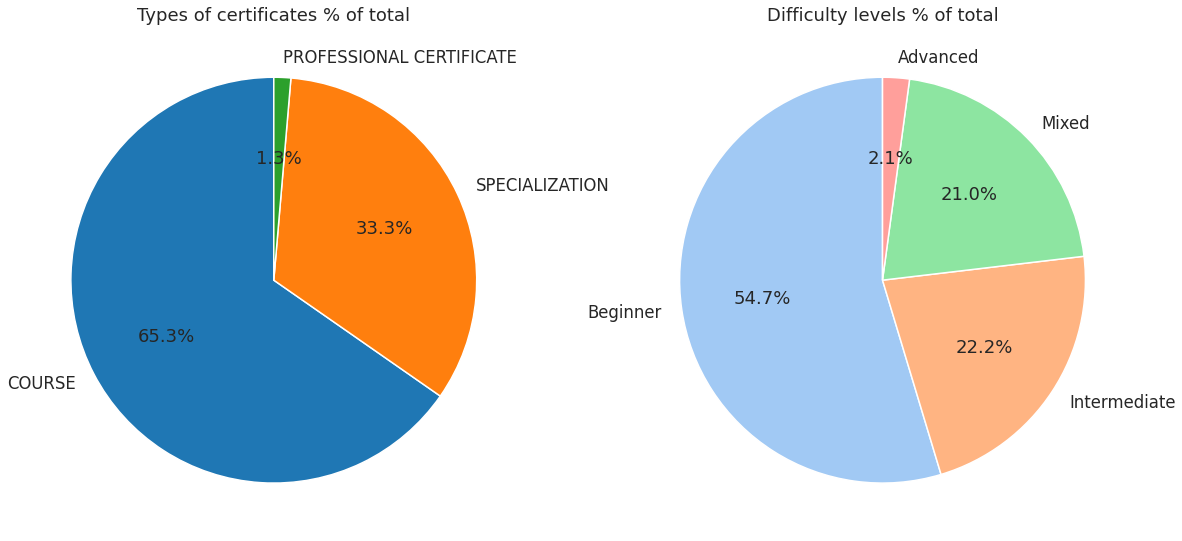

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(1, 2, 1)
plt.pie(certificate_type, labels=certificate_type.index,
        autopct='%.1f%%',startangle=90)

plt.title('Types of certificates % of total')

plt.subplot(1, 2, 2)
plt.pie(variety_of_difficulty, labels=variety_of_difficulty.index,
        colors=sns.color_palette('pastel'), autopct='%.1f%%', startangle=90)

plt.title('Difficulty levels % of total')

plt.show()

Pie charts also shows that there is a variety of different options regarding courses difficulties and certificates that students can participate in.

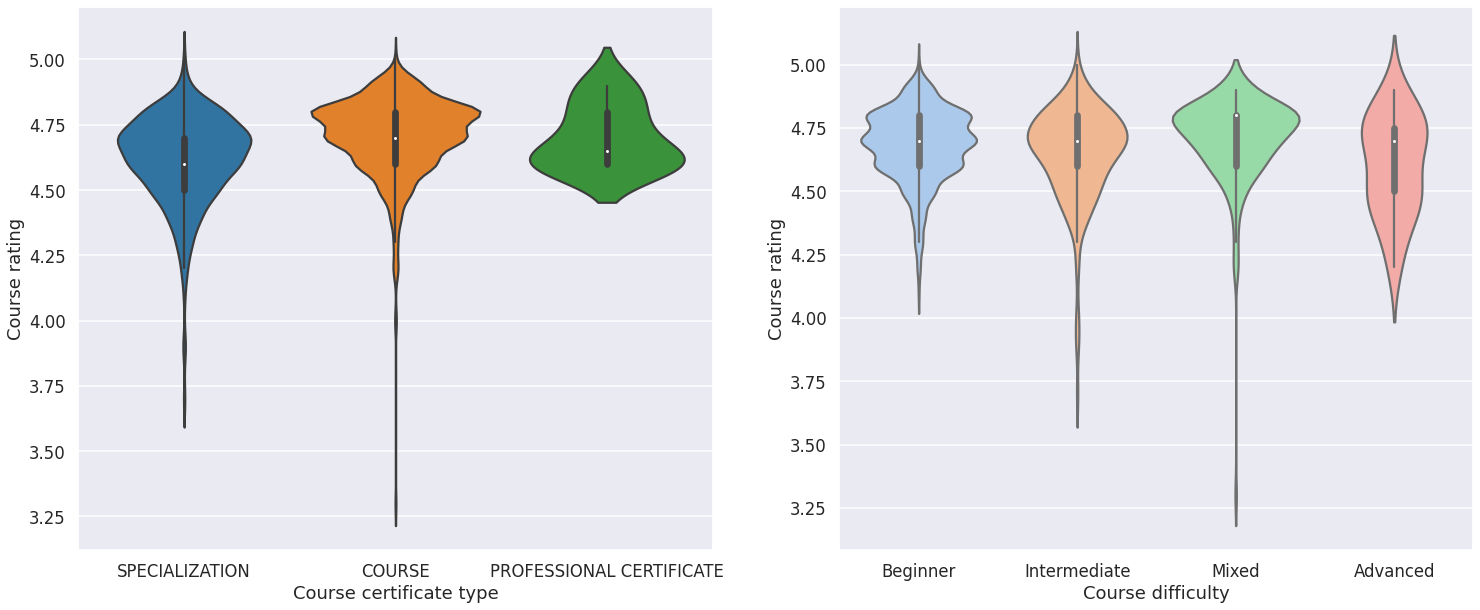

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(25,10))

sns.violinplot(data=coursera_df, x="Course certificate type", y="Course rating",
               ax=ax[0])

sns.violinplot(data=coursera_df, x="Course difficulty", y="Course rating",
               ax=ax[1], palette='pastel')

plt.show()

Here we have course ratings distribution by certificate type and by course difficulty, I decided to make them because violinplots are one of the best ways to visualize distribution.

##### How many organizations submitted their courses?

In [ ]:
org_count=coursera_df['Course organization'].nunique()
print(f'{org_count} organizations submitted their courses.')

154 organizations submitted their courses.


##### Top 10 organizations which submitted most courses and amount of them

In [ ]:
coursera_df['Course organization'].value_counts().nlargest(10)

University of Pennsylvania                    59
University of Michigan                        41
Google Cloud                                  34
Johns Hopkins University                      28
Duke University                               28
University of California, Irvine              27
IBM                                           22
University of Illinois at Urbana-Champaign    22
University of California, Davis               21
University of Virginia                        19
Name: Course organization, dtype: int64

##### How many of the courses are submitted by educational institutions?

In [ ]:
made_by_edu=(coursera_df['Course organization'].str
             .contains('Universi|Institute|College|School|Politech'))
made_by_edu_count=made_by_edu.sum()
print(f'{made_by_edu_count} courses made by educational institutions.')

727 courses made by educational institutions.


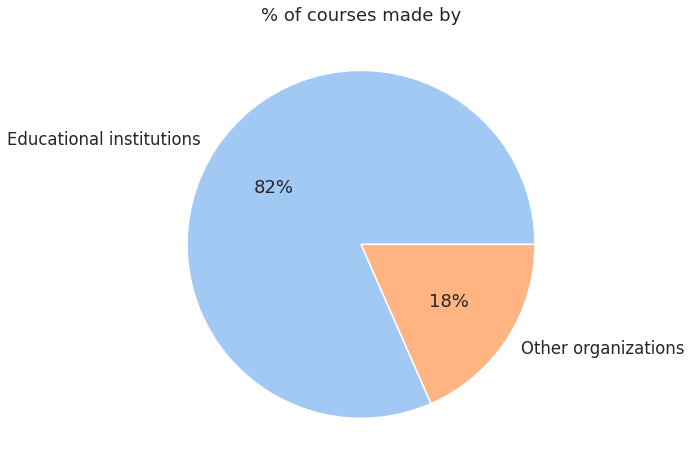

In [ ]:
fig=plt.figure(figsize=(12,8))

data=[made_by_edu_count/len(coursera_df),
      (len(coursera_df)-made_by_edu_count)/len(coursera_df)]
labels=['Educational institutions', 'Other organizations']

colors = sns.color_palette('pastel')

plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')

plt.title('% of courses made by')
plt.show()

This pie chart may show to sceptical people that the most of the courses are made by educated people from educational establishments and that it is worth checking out these courses.

##### Top 5 educational institutions which submitted their courses and amount of them

In [ ]:
course_edu_orgs=(coursera_df['Course organization']
             .loc[coursera_df['Course organization'].str
                  .contains('Universi|Institute|College|School|Politech')])
top_edu_orgs=course_edu_orgs.value_counts()[:5]
top_edu_orgs

University of Pennsylvania          59
University of Michigan              41
Johns Hopkins University            28
Duke University                     28
University of California, Irvine    27
Name: Course organization, dtype: int64

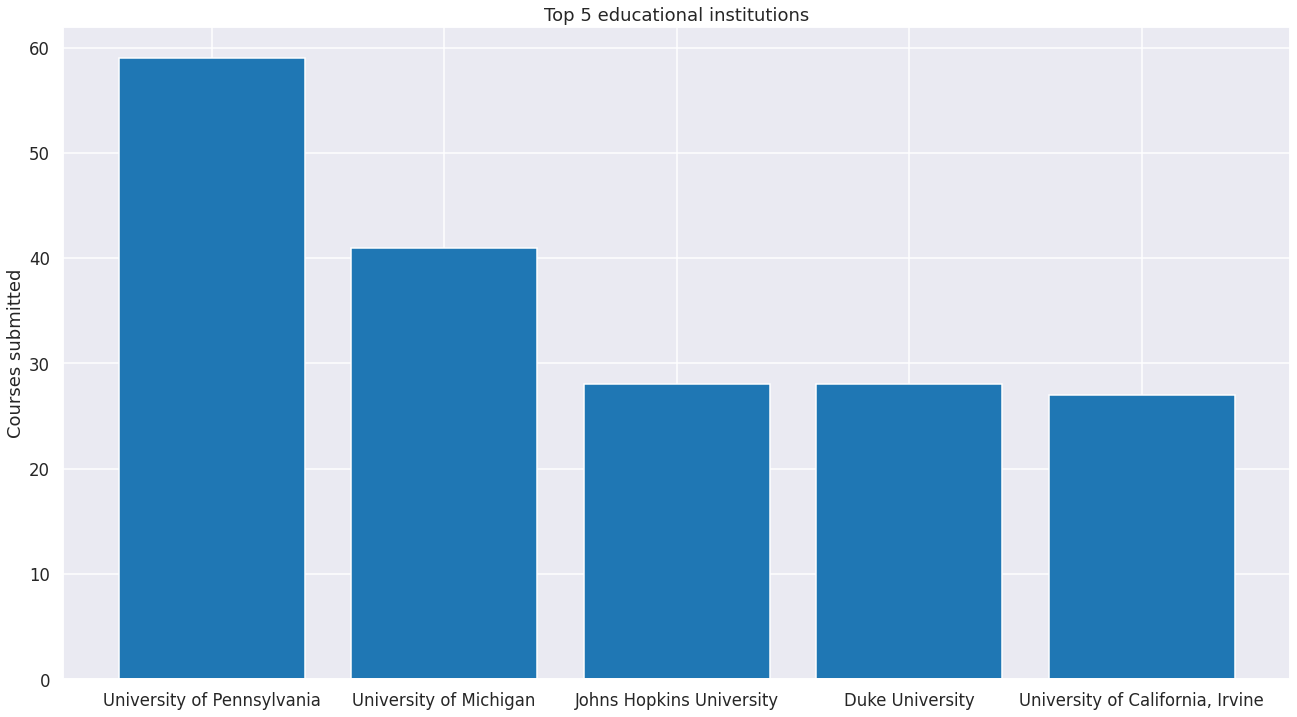

In [ ]:
fig=plt.figure(figsize=(22,12))
ax=plt.axes()

plt.bar(data=top_edu_orgs, x=top_edu_orgs.index, height=top_edu_orgs)

plt.title('Top 5 educational institutions')
plt.ylabel('Courses submitted')
plt.show()

##### Top 5 other organizations which submitted their courses and amount of them

In [ ]:
course_private_orgs=(coursera_df['Course organization']
             .loc[~coursera_df['Course organization'].str
                  .contains('Universi|Institute|College|School|Politech')])
top_private_orgs=course_private_orgs.value_counts()[:5]
top_private_orgs

Google Cloud                34
IBM                         22
deeplearning.ai             16
Google                       9
The Museum of Modern Art     6
Name: Course organization, dtype: int64

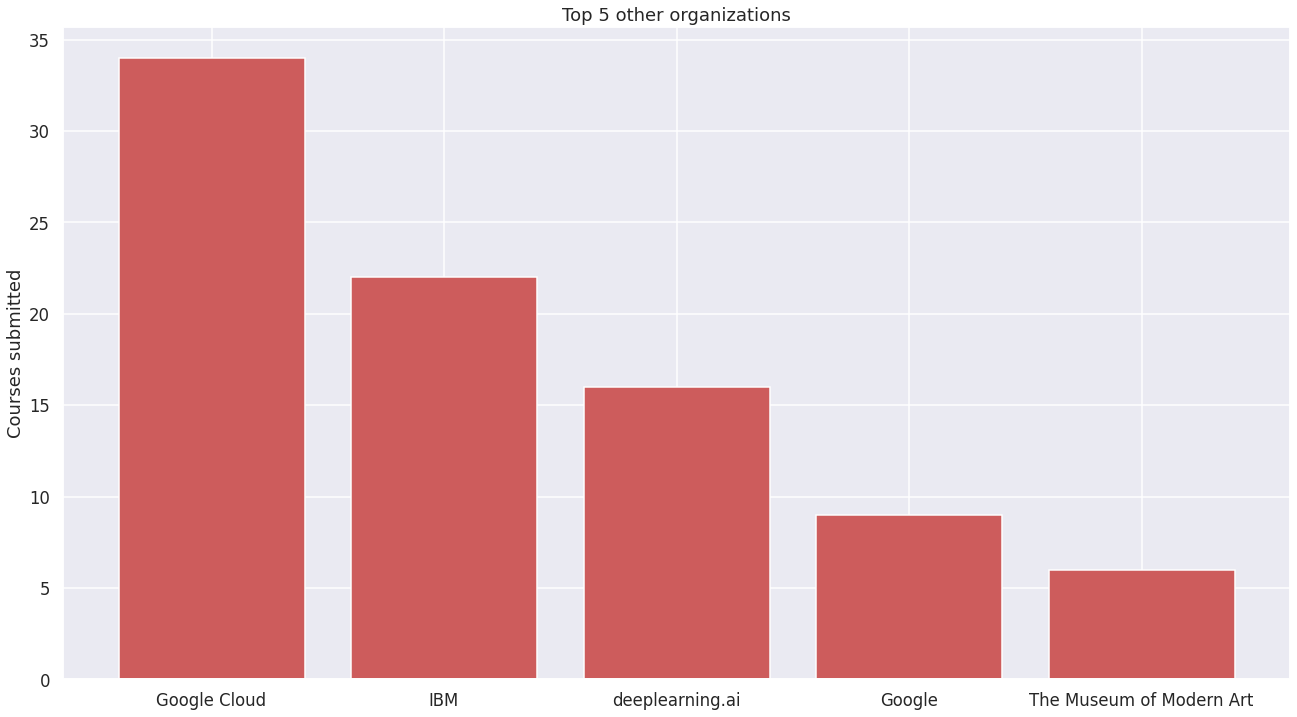

In [ ]:
fig=plt.figure(figsize=(22,12))
ax=plt.axes()

plt.bar(data=top_private_orgs, x=top_private_orgs.index,
        height=top_private_orgs, color='indianred')

plt.title('Top 5 other organizations')
plt.ylabel('Courses submitted')
plt.show()

Even though I stated earlier people may want to be enrolled in these courses because educational institutions made them, there are some pretty big names like "Google", "IBM" and "deeplearning.ai" amongst "other organizations" that are not educational institutions and these might attract people to pick Coursera.

##### Which organizations are most popular by combined amount of students enrolled in their courses ?

In [ ]:
popular_orgs=(coursera_df.groupby(['Course organization'])
              .sum().nlargest(10,columns='Course students enrolled')
              .drop(columns='Course rating'))
popular_orgs

,Course students enrolled
Course organization,
University of Michigan,7437700
University of Pennsylvania,5501300
Stanford University,4854000
"University of California, Irvine",4326000
Johns Hopkins University,4298900
Duke University,3967600
Yale University,3952000
IBM,2956400
deeplearning.ai,2863400


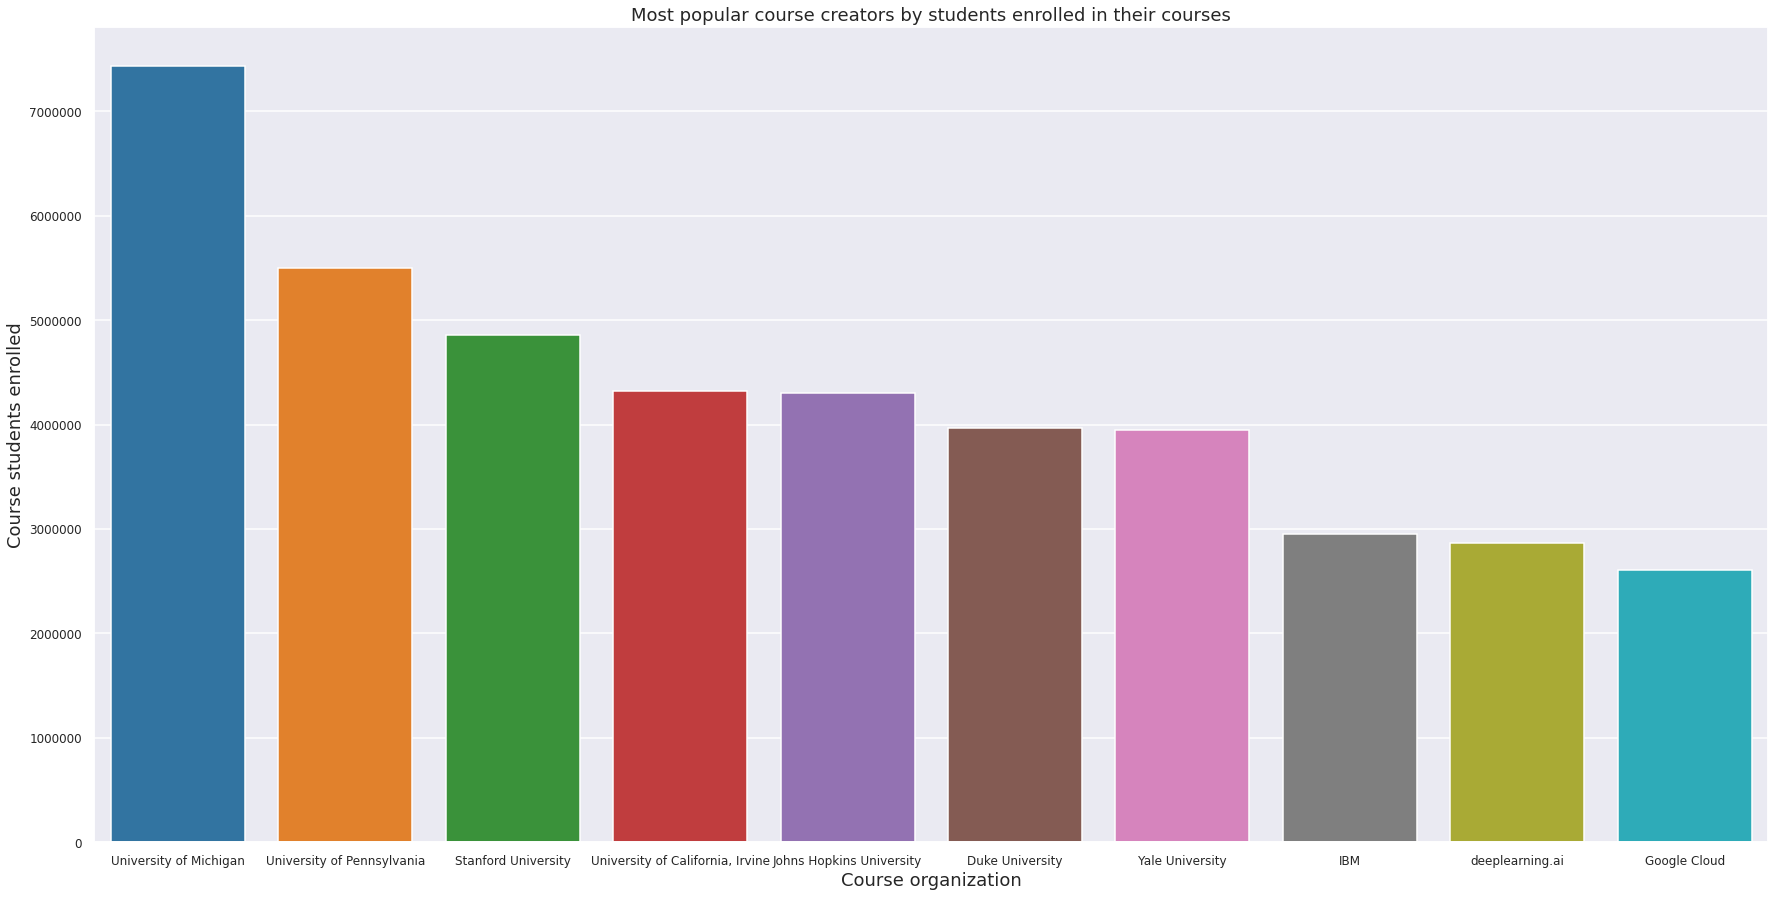

In [ ]:
fig,ax = plt.subplots(figsize=(30,15))

plt.ticklabel_format(style='plain', axis='y')
g=sns.barplot(data=popular_orgs, x=popular_orgs.index,
            y='Course students enrolled', ax=ax)
g.tick_params(labelsize=12)

plt.title('Most popular course creators by students enrolled in their courses')
plt.show()

##### Top 5 University of Michigan courses by students enrolled DataFrame

In [ ]:
org_group=coursera_df.groupby(['Course organization'])
(org_group.get_group('University of Michigan')
 .nlargest(5, 'Course students enrolled'))

,Course title,Course organization,Course certificate type,Course rating,Course difficulty,Course students enrolled
688,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000
674,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed,1300000
765,Successful Negotiation: Essential Strategies a...,University of Michigan,COURSE,4.8,Mixed,750000
56,Applied Data Science with Python,University of Michigan,SPECIALIZATION,4.5,Intermediate,480000
684,Python Data Structures,University of Michigan,COURSE,4.9,Mixed,420000


##### Top 5 courses by students enrolled

In [ ]:
coursera_df.nlargest(5, 'Course students enrolled')['Course title'].to_list()

['Machine Learning',
 'The Science of Well-Being',
 'Python for Everybody',
 'Programming for Everybody (Getting Started with Python)',
 'Data Science']

Because 4/5 of top courses are programming related it would be a good idea to check how many of all courses are programming related.

In [ ]:
keywords='Program|Data|Machine|Code|Computer|Software|Internet|Web|Python|C+|Java|System|AI|Cloud|Blockchain|Cybersecurity|App|VR|UI|UX|AWS|Game|Excel|Design|Virtual'

Keywords to find programming related courses

In [ ]:
prog_courses=(coursera_df
              .loc[coursera_df['Course title']
                   .str.contains(keywords)])
print(f'{len(prog_courses)} courses are related to programming')

439 courses are related to programming


In [ ]:
other_courses=(coursera_df.loc[~coursera_df['Course title']
                               .str.contains(keywords)])
print(f'{len(other_courses)} courses not related to programming')

452 courses not related to programming


Although len(coursera_df)-len(prog_courses) is a faster method of showing number of programming unrelated courses, I prefered to find it this way because later I will be using other_courses DataFrame that I created here to make plots. Now that we know how many of them are programming related and how many are not, we can do a pie chart.

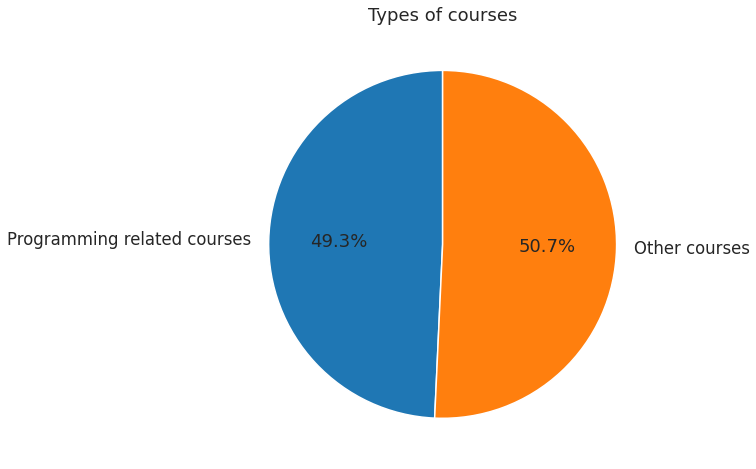

In [ ]:
fig=plt.figure(figsize=(12,8))

data=[len(prog_courses)/len(coursera_df),
      (len(other_courses)/len(coursera_df))]
labels=['Programming related courses', 'Other courses']

colors=sns.color_palette()

plt.pie(data, labels=labels, colors=colors, autopct='%.1f%%', startangle=90)

plt.title('Types of courses')
plt.show()

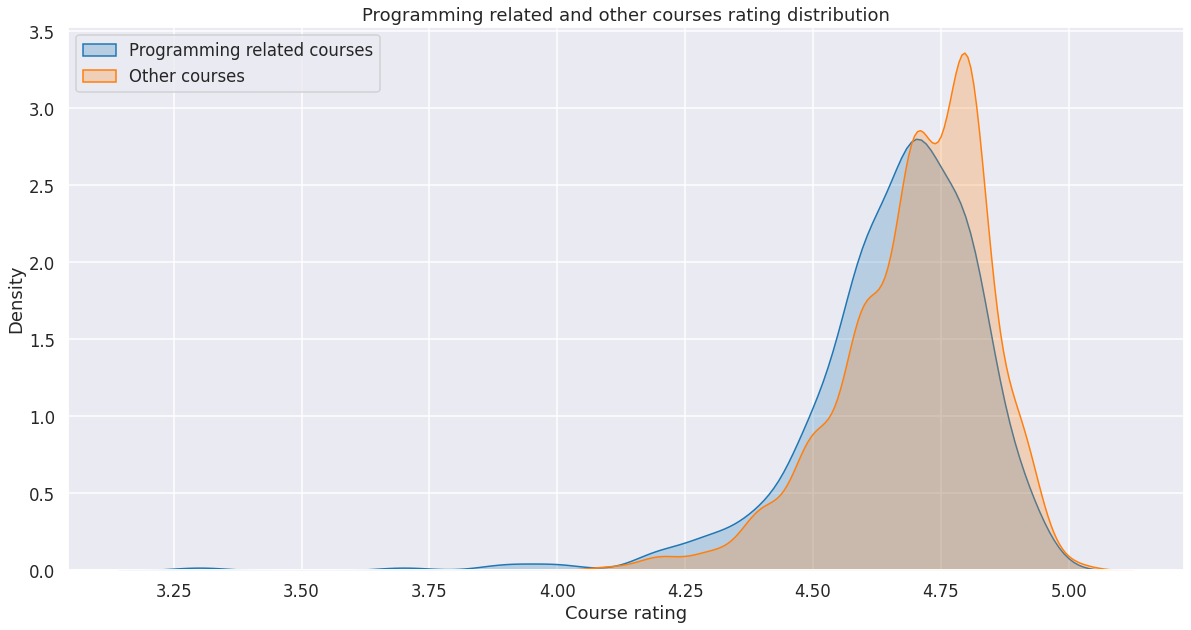

In [ ]:
fig=plt.figure(figsize=(20,10))

sns.color_palette()

sns.kdeplot(data=prog_courses, x='Course rating', shade=True)
sns.kdeplot(data=other_courses, x='Course rating', shade=True)

plt.legend(['Programming related courses', 'Other courses'], loc='upper left')
plt.title('Programming related and other courses rating distribution')
plt.show()

In this distribution graph it is clear that "Other courses" are rated better than the programming ones.

In [ ]:
prog_students=prog_courses['Course students enrolled'].sum()
other_students=other_courses['Course students enrolled'].sum()

In [ ]:
print(f'{prog_students} combined students enrolled in programming related courses')
print(f'{other_students} combined students enrolled in other courses')
print(f'{prog_students-other_students} more combined students in programming courses')

44320300 combined students enrolled in programming related courses
36361600 combined students enrolled in other courses
7958700 more combined students in programming courses


Although there is little bit more unrelated to programming courses and they are rated better, programming courses have almost 8 milion (10%) more combined students enrolled.

In [ ]:
prog_courses_certificates=(prog_courses['Course certificate type']
                           .value_counts())
prog_courses_difficulty=(prog_courses['Course difficulty']
                         .value_counts())

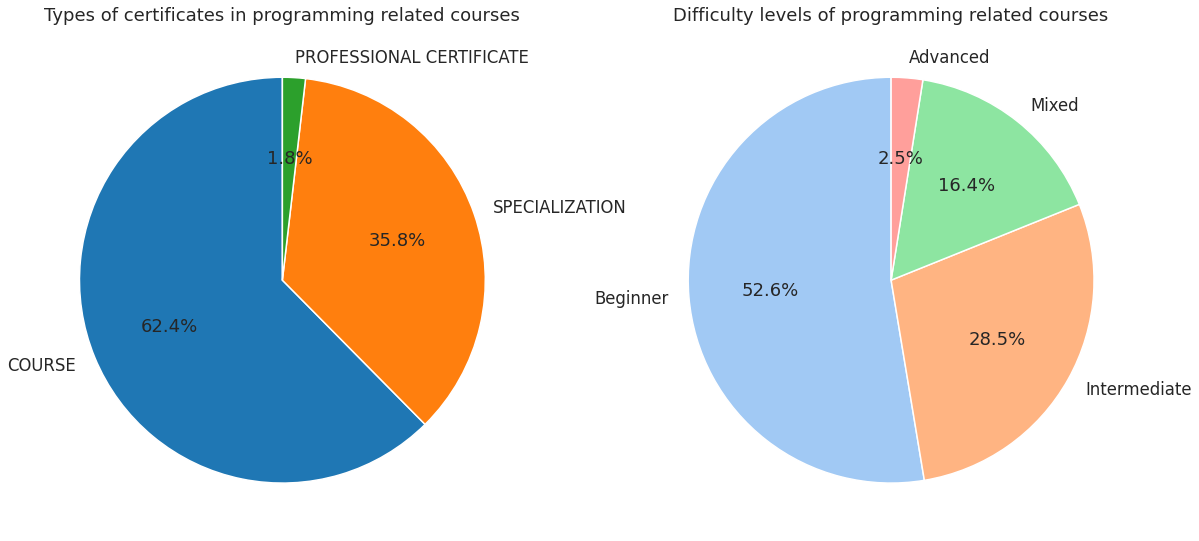

In [ ]:
fig=plt.figure(figsize=(20,20))

plt.subplot(1, 2, 1)
plt.pie(prog_courses_certificates, labels=prog_courses_certificates.index,
        colors=sns.color_palette(), autopct='%.1f%%',startangle=90)

plt.title('Types of certificates in programming related courses')

plt.subplot(1, 2, 2)
plt.pie(prog_courses_difficulty, labels=prog_courses_difficulty.index,
        colors=sns.color_palette('pastel'), autopct='%.1f%%', startangle=90)

plt.title('Difficulty levels of programming related courses')

plt.show()

Thought it might be intresting to look at types of certificates and difficulty levels of programming related courses. These pie charts do not differ too much from the initial pie charts of the whole DataFrame and we can say that there is plenty of different programming courses to be enrolled in.

### Conclusion
If you are looking for a site to learn new things related to programming or not, Coursera is the place to go. It provides many free courses made by famous educational institutions and other organizations including Google. These courses are rated well and are newbie friendly (more than 50% of courses are of Beginner level). If you feel like you are past the beginner level there are some for Intermediate and Advanced level courses aswell! Coursera is the place to start off your career in many fields by getting those certificates and putting them on your CV.

### What can be improved
- Changing numeric values from 64 bits to less so the calculations are faster. I didn't do that because dataset only has 891 rows of data.
- In 'Most popular course creators by students enrolled in their courses' graph change educational institutions color to blue and other organizations color to red so it matches the previous two graphs.
- Make a heatmap of some correlation.
- Better storytelling and datawrangling to prove a point.